## <b> $ \color{blue}{\text {Welcome!: Introduction to Python for Data Visualization with Jupyter Notebooks!} } $ </b>
***
#### $\color{purple}{\text{Course details: 34:816:656 ||||||| Rutgers University ||||||| E. J. Bloustein School}}$
***
+ Master of Public Informatics Program: https://bloustein.rutgers.edu/graduate/public-informatics/mpi/
+ Informatics graduate certificate: https://bloustein.rutgers.edu/graduate/public-informatics/mpi/certificate/
+ Join us on LinkedIn for the latest updates on MPI, informatics, DS and AI: https://www.linkedin.com/company/rutgers-masters-in-public-informatics/
+ PISG Student group for informatics / analytics / AI: https://bloustein.rutgers.edu/students/organizations/pisg/
***


+ <b> Industry updates [@ Jim Samuel](https://twitter.com/jimsamuel/) ---- <b> https://twitter.com/jimsamuel/ </b>
***


#### Notes & More resources
+ This notebook is collection of foundational instructions from multiple unlisted sources
+ If you click on "Help" in the toolbar, there is a list of references for common Python tools, e.g. numpy, pandas.
+ [IPython website](https://ipython.org/) |||||||
+ [Markdown basics](https://daringfireball.net/projects/markdown/) |||||||
+ [Jupyter Notebook Documentation](https://jupyter-notebook.readthedocs.io/en/stable/index.html) |||||||
+ [Real Python Jupyter Tutorial](https://realpython.com/jupyter-notebook-introduction/) |||||||
+ [Dataquest Jupyter Notebook Tutorial](https://www.dataquest.io/blog/jupyter-notebook-tutorial/) |||||||
+ [Stack Overflow](https://stackoverflow.com/) |||||||

<div class="alert alert-info">
    
We support and continue to contribute to open-source code and resources BUT the contents of this for-credit and graded course are protected for ethical reasons and course integrity. Beyond use within this course, none of the course materials developed for this course may be copied, reproduced, re-published, uploaded, posted, transmitted, or distributed in any way without written authorization from the concerned faculty /authors.    
### Copyright Statement: All rights reserved.
* The contents (Jupyter notebooks, Assignments, Exams and other developed materials) presented in this course have been carefully prepared to benefit students enrolled in this course.
* <b> Therefore, for the benefit of future students and course integrity,  PLEASE DO NOT SHARE OR DISSEMINATE </b> any of these materials outside of this class so that the learning experience of future students remains unique and valuable.  
    * <b> Please do not post these materials to GitHub or to any other platform or website. </b>
    * When / If using Google Colab, pls. ensure that the file is not set up for public access (default expected setting is private).
    
</div>

***

<div class="alert alert-info">
    
### Notebook 11: Textual Data Visualization - 2

<ul type="1">
<li> In this Module, we will study numerous plots critical for informatics, data science and analytics professionals: Visualizing textual data / unstructured data using Python for Data Visualization with Jupyter Notebooks (Part -2). </li>
</ul>
</div>

#### Objectives

<ul type="1">
<li>
This notebook will teach you intermediate textual data analysis -visualization.</li>
<li>You will also learn some key concepts that will be useful for managing data visualizations of text data.</li>
<li>By the end of this notebook, you should be able to understand the how to visualize text, including a firm understanding of word clouds and n-grams.</li>
</ul>



### Advanced WordCloud

#### Working with Ngrams / Bigrams

* A phrase with two words is usually known as a Bigram.

* Till now, we have seen how to generate a word cloud for a single word.

* Now, lets see how to create a word cloud for a bigram.

* The collation parameter tells the python to create collations. Setting it to True would help us generate a wordcloud with bigrams.  

* Lets create a word cloud for the same.

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing matplotlib and displaying the outputs directly below the execution cell
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# If you have run the previous notebook, then you only need to run below
# No installs / downloads needed
import nltk
from nltk.corpus import stopwords

stopwords = STOPWORDS
stopwords.add('use')
stopwords.add('will')

In [ ]:
# Opening the data file
f = open('m3_data_2.txt','r', encoding = 'UTF-8')    # try removing encoding = 'UTF-8' when using Colab

# Reading the data into a variable.
data = f.read()

# Converting it to lower case
data = data.lower()

data[:277]

'article\ncovid-19 public sentiment insights and machine learning for tweets classification\njim samuel 1,* , g. g. md. nawaz ali 2,* , md. mokhlesur rahman 3,4 , ek esawi 5 and yana samuel 6\n1 2 3\n4\n5 6\n* correspondence: jim@aiknowledgecenter.com (j.s.); ggmdnawazali@ucwv.edu (g'

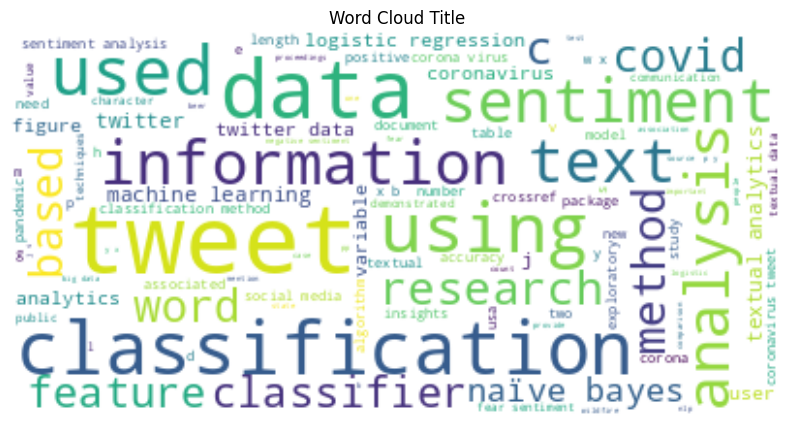

In [ ]:
wordcloud = WordCloud(collocations= True,
                      stopwords=stopwords, background_color="white",
                      max_font_size=50, max_words=100).generate(data)

# Here, we use the rcParams to set the image size
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title('Word Cloud Title')
plt.show()

* From the above graph, we can see some bigrams like "machine learning" and "logistic regression".

* Similarly, we can use trigrams in the wordcloud.

* For this example, lets create a sample trigram dataset along with frequencies and generate a wordcloud.

In [ ]:
trigarm_dict = {"Artificial Intelligence": 40, "sit amet consectetur": 20, "adipiscing elit Donec": 21,
                "semper turpis sit": 20, "amet aliquam gravida": 5, "Duis bibendum turpis": 34,
                "ac purus cursus": 56, "ut aliquet ante":9, "finibus Integer dignissim": 23,
                "ML": 64, "AI": 77, "ML": 63, "NLP": 57}

wordcloud = WordCloud(background_color="white",
                          colormap="twilight_shifted").generate_from_frequencies(trigarm_dict)

rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud Title')
plt.show()


# Performing Textual Data Visualization for a CSV file

* Now, lets open a CSV file and perform data visualization using word clouds.

* The CSV file has a textual column named 'text' on which we would be performing the analysis.

* The CSV file also has a column named sentiment. The sentiment represents the sentiment of the column 'text'.

* The values of the column ranges between -1 and +1 where a value closer to +1 indicates an overall positivity while a value closer to -1 indicates the overall negativity.

* A value of 0 indicates that the text is neutral in nature.

* We will also observe how to generate bigrams, trigrams or n-grams from the given dataset.

* This generated n-grams can be used in the word clouds and other possible visualizations.

In [ ]:
# Lets open the twitter dataset and read the first 200 rows of it.
twitter_data = pd.read_csv('TwitterDataWithSentiment.csv', encoding = "ISO-8859-1")[:200]

twitter_data.head()

ï»¿ created_at    screen_name  \
0    0  2/10/2021    kovacsjulie   
1    1  2/10/2021  DZimm65086024   
2    2  2/10/2021  VanessaMinnis   
3    3  2/10/2021       KayyMott   
4    4  2/10/2021    clemsonlady   

                                                text               source  \
0  I feel like IÃÂ¢Ãâ¬Ãâ¢m stuck in an endle...   Twitter for iPhone   
1  @latimes A stark reminder; if you decide to ta...  Twitter for Android   
2  Update on the vaccine: arm is sore (but not te...  Twitter for Android   
3  14 hours post vaccine dose #2: my arm is swoll...   Twitter for iPhone   
4  @mavants Passed Vaccine for teachers.. but has...   Twitter for iPhone   

   display_text_width reply_to_screen_name  favorite_count  favourites_count  \
0                 275                  NaN               1              3756   
1                 280              latimes               0               748   
2                 106                  NaN               0             56370   
3                 160                  NaN               0             25184   
4                  98              mavants               0             45724   

  hashtags  ...                 location protected followers_count  \
0      NaN  ...                      NaN     False            2265   
1      NaN  ...                      NaN     False              14   
2      NaN  ...            San Diego, CA     False             274   
3      NaN  ...    Western Massachusetts     False             452   
4      NaN  ...  Clemson, South Carolina     False            2499   

  friends_count listed_count  statuses_count  favourites_count.1  \
0           278           10            2103                3756   
1           261            0            2321                 748   
2           424            1            5844               56370   
3           569            4           21159               25184   
4          4242           48          111418               45724   

   account_created_at  sentiment  Senti_Class  
0           3/14/2011    -0.1531           -1  
1           4/10/2020     0.6486            1  
2           1/18/2016    -0.2598           -1  
3           1/28/2011    -0.4419           -1  
4           4/17/2009     0.0000            0  

[5 rows x 24 columns]

* Let us first create a basic Wordcloud from the above CSV Dataset.

* For this exercise, we will be using the text column to create the word cloud and will be removing the stop words by using the list provided by the NLTK.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

# This will combine the whole text column together and convert it to the lower case
combined_text = ' '.join(twitter_data['text'].str.lower())


wordcloud = WordCloud(stopwords=sw, background_color="white", max_font_size=50, max_words=88).generate(combined_text)

# Here, we use the rcParams to set the image size
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud Title')
plt.axis("off")
plt.show()

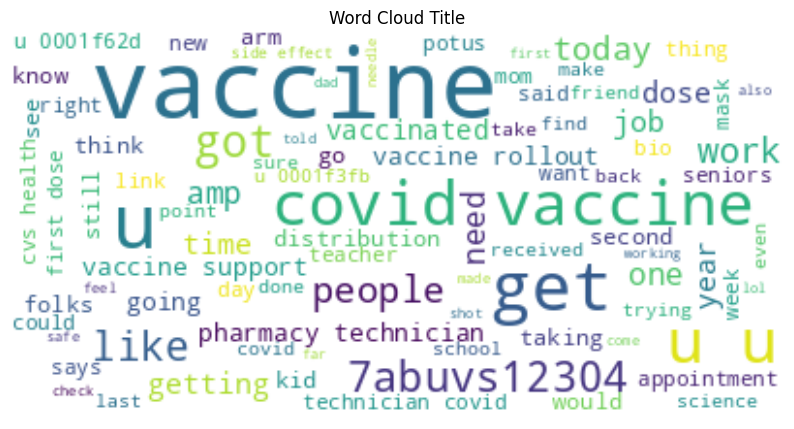

In [ ]:
# Above needs to be improved - a lot, here is one simple step to clean unwanted characters:

import re

from nltk.corpus import stopwords
sw = stopwords.words('english')

combined_text = ' '.join(twitter_data['text'].str.lower())

# one simple step to clean unwanted characters.
# clean_text = re.sub('[^a-zA-Z0-9]', ' ', combined_text)    # removes special characters a^ , a~ , etc; replace with space

clean_text = re.sub('[^a-zA-Z0-9]+', ' ', combined_text)    # removes special characters a^ , a~ , etc;

wordcloud = WordCloud(stopwords=sw, background_color="white", max_font_size=50, max_words=88).generate(clean_text)

# Here, we use the rcParams to set the image size
rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Word Cloud Title')
plt.axis("off")
plt.show()



In [ ]:
# Type of data?
type(combined_text)

str

In [ ]:
# Type of data?
type(clean_text)

str

In [ ]:
# combined_text[:]   #view all
clean_text[:222]  # 222

'i feel like i m stuck in an endless do loop fortran code for younger folks when i check for covid vaccines for my dad at least 10x a day i get this message we are not currently scheduling appointments for the first dose of'

In [ ]:
clean_text[2298:3005]

'not 100 effective but good enough right just like any other vaccine i suppose no one should 7abuvs12304 it s impossible to get it after being vaccinated but it s not likely am i right you work w these patients please explain u 0001f62d on this day last year i was seeing avenged sevenfold for the 5th time wear a mask get your vaccine for 7abuvs12304 sake please the amount of grown men that are afraid of a one inch needle filled with a vaccine that also has a whole 7abuvs12304 sleeve full of tattoos i ll never understand it yo i am completely in pain from the first vaccine my arm is just wrecked and aching but it s still worth it goblue37 the vaccine manufacturing supplies and distribution are rampin'

In [ ]:
twitter_data_clean = twitter_data
twitter_data_clean.head()

ï»¿ created_at    screen_name  \
0    0  2/10/2021    kovacsjulie   
1    1  2/10/2021  DZimm65086024   
2    2  2/10/2021  VanessaMinnis   
3    3  2/10/2021       KayyMott   
4    4  2/10/2021    clemsonlady   

                                                text               source  \
0  I feel like IÃÂ¢Ãâ¬Ãâ¢m stuck in an endle...   Twitter for iPhone   
1  @latimes A stark reminder; if you decide to ta...  Twitter for Android   
2  Update on the vaccine: arm is sore (but not te...  Twitter for Android   
3  14 hours post vaccine dose #2: my arm is swoll...   Twitter for iPhone   
4  @mavants Passed Vaccine for teachers.. but has...   Twitter for iPhone   

   display_text_width reply_to_screen_name  favorite_count  favourites_count  \
0                 275                  NaN               1              3756   
1                 280              latimes               0               748   
2                 106                  NaN               0             56370   
3                 160                  NaN               0             25184   
4                  98              mavants               0             45724   

  hashtags  ...                 location protected followers_count  \
0      NaN  ...                      NaN     False            2265   
1      NaN  ...                      NaN     False              14   
2      NaN  ...            San Diego, CA     False             274   
3      NaN  ...    Western Massachusetts     False             452   
4      NaN  ...  Clemson, South Carolina     False            2499   

  friends_count listed_count  statuses_count  favourites_count.1  \
0           278           10            2103                3756   
1           261            0            2321                 748   
2           424            1            5844               56370   
3           569            4           21159               25184   
4          4242           48          111418               45724   

   account_created_at  sentiment  Senti_Class  
0           3/14/2011    -0.1531           -1  
1           4/10/2020     0.6486            1  
2           1/18/2016    -0.2598           -1  
3           1/28/2011    -0.4419           -1  
4           4/17/2009     0.0000            0  

[5 rows x 24 columns]

In [ ]:
# tx = twitter_data['text']

# twitter_data_clean = re.sub('[^a-zA-Z0-9]+', ' ', tx[1])
twitter_data_clean['text'] = twitter_data['text'].str.replace('[^a-zA-Z0-9]+', ' ')
# df['E'] = df['B'].str.replace('\W', '')
twitter_data_clean.head()

ï»¿ created_at    screen_name  \
0    0  2/10/2021    kovacsjulie   
1    1  2/10/2021  DZimm65086024   
2    2  2/10/2021  VanessaMinnis   
3    3  2/10/2021       KayyMott   
4    4  2/10/2021    clemsonlady   

                                                text               source  \
0  I feel like I m stuck in an endless do loop FO...   Twitter for iPhone   
1   latimes A stark reminder if you decide to tak...  Twitter for Android   
2  Update on the vaccine arm is sore but not terr...  Twitter for Android   
3  14 hours post vaccine dose 2 my arm is swollen...   Twitter for iPhone   
4   mavants Passed Vaccine for teachers but has t...   Twitter for iPhone   

   display_text_width reply_to_screen_name  favorite_count  favourites_count  \
0                 275                  NaN               1              3756   
1                 280              latimes               0               748   
2                 106                  NaN               0             56370   
3                 160                  NaN               0             25184   
4                  98              mavants               0             45724   

  hashtags  ...                 location protected followers_count  \
0      NaN  ...                      NaN     False            2265   
1      NaN  ...                      NaN     False              14   
2      NaN  ...            San Diego, CA     False             274   
3      NaN  ...    Western Massachusetts     False             452   
4      NaN  ...  Clemson, South Carolina     False            2499   

  friends_count listed_count  statuses_count  favourites_count.1  \
0           278           10            2103                3756   
1           261            0            2321                 748   
2           424            1            5844               56370   
3           569            4           21159               25184   
4          4242           48          111418               45724   

   account_created_at  sentiment  Senti_Class  
0           3/14/2011    -0.1531           -1  
1           4/10/2020     0.6486            1  
2           1/18/2016    -0.2598           -1  
3           1/28/2011    -0.4419           -1  
4           4/17/2009     0.0000            0  

[5 rows x 24 columns]

* Now that we have created a basic word cloud, let us categorize the word cloud based on the sentiment.

* Let us use three lists namely positive_sentiment, negative_sentiment and neutral_sentiment where we iterate through every row of the dataframe and based on the sentiment, add them to the corresponding lists.

In [ ]:
positive_sentiment = []
negative_sentiment = []
neutral_sentiment = []


for rowIndex, row in twitter_data.iterrows():

    if twitter_data_clean.loc[rowIndex, 'sentiment'] < 0:
        negative_sentiment.append(twitter_data_clean.loc[rowIndex, 'text'])
    elif twitter_data_clean.loc[rowIndex, 'sentiment'] == 0:
        neutral_sentiment.append(twitter_data_clean.loc[rowIndex, 'text'])
    else:
        positive_sentiment.append(twitter_data_clean.loc[rowIndex, 'text'])


print(len(positive_sentiment), len(negative_sentiment), len(neutral_sentiment))

98 58 44


* From the above output, we can see that we have a total of 98 tweets with a positive sentiment, 58 tweets with a negative sentiment and 44 tweets with a neutral sentiment.

* Out of 200, the distrubution of the tweets is as follows:

In [ ]:
fig, ax = plt.subplots(figsize = (10, 5))

yvalues = [98, 58, 44]
xvalues = ['Positive Sentiment', 'Negative Sentiment', 'Neutral Sentiment']

ax.bar(xvalues, yvalues, edgecolor="black");
ax.set_xticklabels(xvalues, va='top')

plt.title('Frequency Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Tweets')
plt.show()

* Now, using the above data, let us create the word clouds based on individual sentiment.

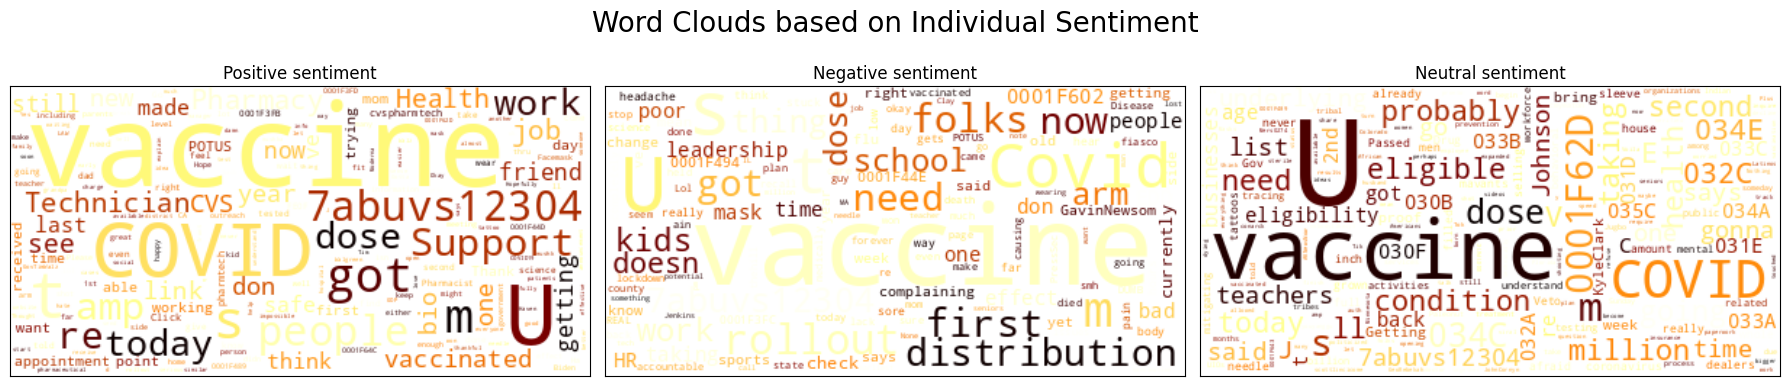

In [ ]:
# Generate a word cloud - positive sentiment
wordcloud_positive = WordCloud(collocations= False,
                      background_color="white",
                      colormap="afmhot").generate(" ".join(positive_sentiment))


wordcloud_negative = WordCloud(collocations= False,
                      background_color="white",
                      colormap="afmhot").generate(" ".join(negative_sentiment))


wordcloud_neutral = WordCloud(collocations= False,
                      background_color="white",
                      colormap="afmhot").generate(" ".join(neutral_sentiment))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 9, forward=True)
ax1.imshow(wordcloud_positive,interpolation="bilinear")
ax2.imshow(wordcloud_negative,interpolation="bilinear")
ax3.imshow(wordcloud_neutral,interpolation="bilinear")
ax1.title.set_text('Positive sentiment')
ax2.title.set_text('Negative sentiment')
ax3.title.set_text('Neutral sentiment')
ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)

fig.tight_layout()

# Adding a main title to the plot
fig.suptitle('Word Clouds based on Individual Sentiment', fontsize = 20)

# Adjusting the layout of the subplots
fig.subplots_adjust(top=1.45)
plt.show()

* The above wordclouds has a few words which doesn't help us much in the visualization.

* The words like Iâ, us, one can be ignored.

* Therefore, lets add these words into the stopwords list and create a bigram dataframe.

* In this dataframe, we would be having two columns, the digrams and their frequency.

* We use CountVectorizer to create a bigram.

* The CountVectorizer convert a collection of text documents to a matrix of token counts.

* The ngram_range parameter in the CountVectorizer defines which n-grams are we interested in. 2 means bigram and 3 means trigram.

* Now, let us create the bigrams and sort it based on its frequency.

In [ ]:
# Importing CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Adding the words to the stop words
sw = sw + ["Iâ", "go", "itâ", "CVS"]

# Since we are only interested in bigrams, we put the ngram_range to be (2, 2)
# For trigrams, we put this to 3.
c_vec = CountVectorizer(stop_words=sw, ngram_range=(2, 2))

# matrix of ngrams
ngrams = c_vec.fit_transform(twitter_data_clean['text'])

# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)

# list of ngrams
vocab = c_vec.vocabulary_

df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})





* From the above code, we found a total of 2728 bigrams.

* Now, let us create a word cloud for the top 50 bigrams.

* In order to do that, let us create a dictionary where key is the bigram and the value is the frequency of the bigram.

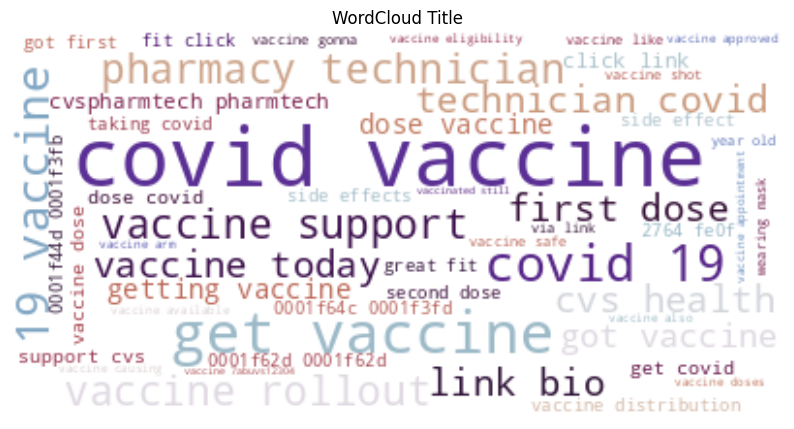

In [ ]:
bigramdict = {}

for rowIndex, row in df_bigram[:50].iterrows():
    rowList = []
    for columnIndex, value in row.items():

        rowList.append(value)

    bigramdict[rowList[1]] = rowList[0]


wordcloud = WordCloud(background_color="white",
                          colormap="twilight_shifted").generate_from_frequencies(bigramdict)

rcParams['figure.figsize'] = 10, 20
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.title('WordCloud Title')
plt.show()


* The above wordcloud is based on the most frequent bigrams in the given dataset.

* Similarly, we can generate trigrams using the same method.

* Let us plot the bar graph using the bigram dictionary that signifies the frequency distribution

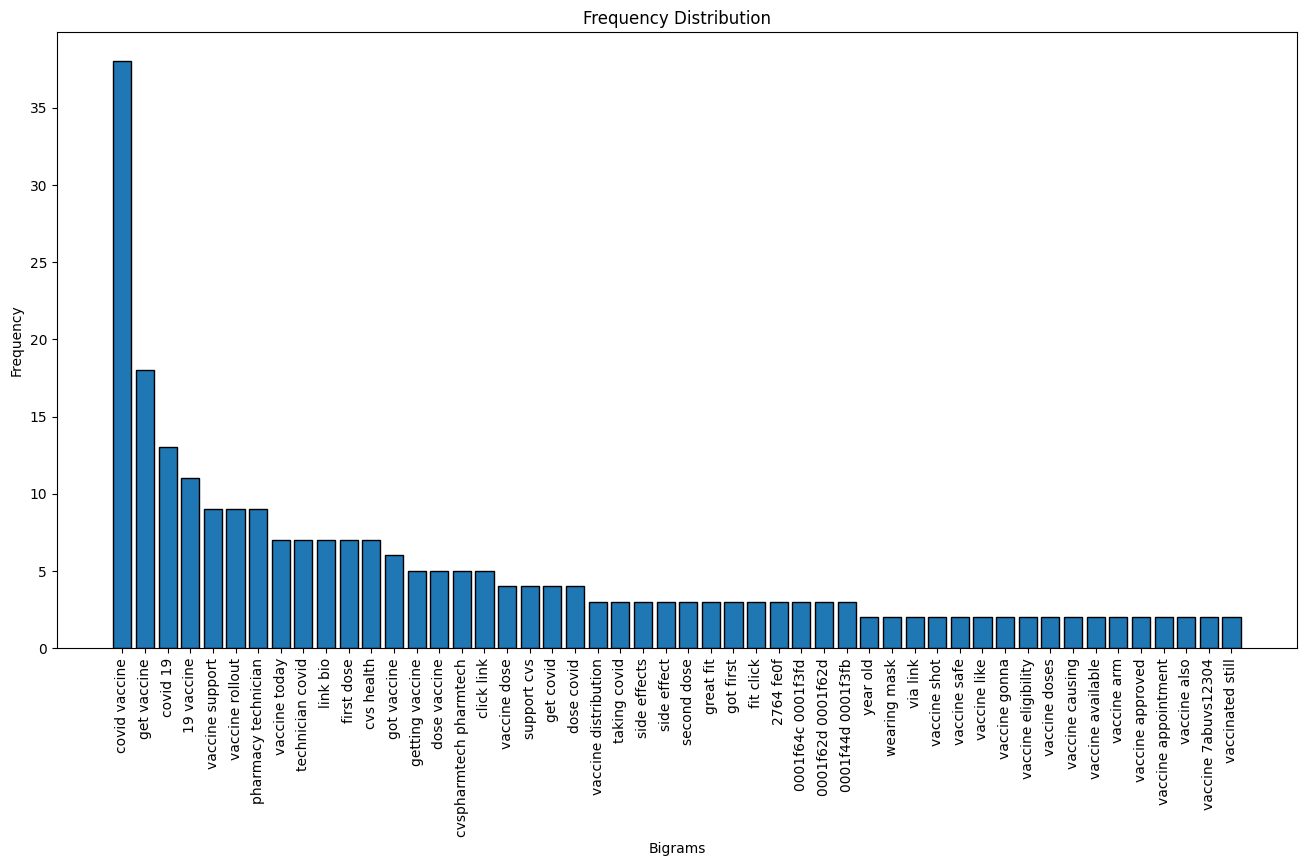

In [ ]:
bigramtuple = sorted(bigramdict.items(), key = lambda x: x[1], reverse=True)

fig, ax = plt.subplots(figsize = (16, 8))

xvalues = []
yvalues = []

for key, value in bigramtuple:
  xvalues.append(key)
  yvalues.append(value)

ax.bar(xvalues, yvalues, edgecolor="black");
ax.set_xticklabels(xvalues, rotation=90, va='top')

plt.title('Frequency Distribution')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')

plt.show()




# Packed Bubble Charts on the Textual Data

* A packed bubble chart displays data in a cluster of circles.

* Each circle has a weight associated to it. The weight can represent any value. For example, frequency of a word or a phrase in a stream of data.

* Usually, the position of the bubbles are managed by the package itself to generate a more compact plot.

* Imagine, we have a set of 10 phrases with some random frequencies.

* Let us create a dataset for the above problem and plot the chart.

* Note that a two word phrase is called as a bigram and a three letter phrase is called as a trigram.

* For this example, lets take 10 random bigrams and plot the chart.

* Note that we can create the plot using the above example as well.

* The BubbleChart class is available in the matplotlib documentation and in this example, we use the class without making any changes to it.

* [Documentation Link](https://matplotlib.org/stable/gallery/misc/packed_bubbles.html)

In [ ]:
class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        area : array-like
            Area of the bubbles.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.

        Notes
        -----
        If "area" is sorted, the results might look weird.
        """
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        """
        Draw the bubble plot.

        Parameters
        ----------
        ax : matplotlib.axes.Axes
        labels : list
            Labels of the bubbles.
        colors : list
            Colors of the bubbles.
        """
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

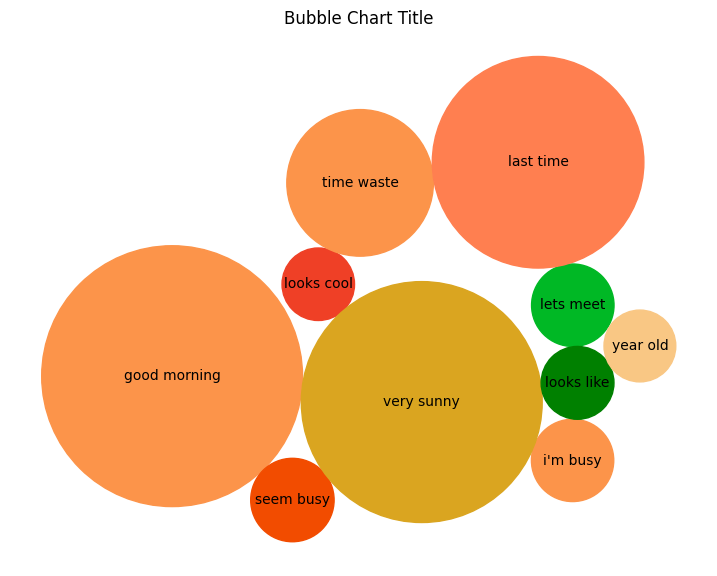

In [ ]:

data = {
    'bigrams': ['good morning', 'seem busy', 'lets meet', 'i\'m busy', 'looks cool', 'very sunny', 'looks like', 'year old', 'time waste', 'last time'],

    'frequency': [41212, 4215,4119, 4106, 3184,  35151, 3214, 3123, 13014, 27112],

    'color': ['#FC944A', '#F24C00', '#00B825', '#FC944A', '#EF4026', 'goldenrod','green', '#F9C784', '#FC944A', 'coral']
}


bubble_chart = BubbleChart(area=data['frequency'],
                           bubble_spacing=0.1)
bubble_chart.collapse()


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
fig.set_size_inches(9, 13, forward=True)
bubble_chart.plot(
    ax, data['bigrams'], data['color'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
plt.title('Bubble Chart Title')
plt.show()